In [3]:
import pandas as pd

# 读取CSV文件
file_path = "Mn_lmd.csv"  
df = pd.read_csv(file_path)

# 只保留前1740行，前1740行数据较为完整，后面的数据就只有两列1st dopant valency,1st doping concentration
df = df.iloc[:1740, :]

# 查看前5行数据
print("前5行数据：")
print(df.head())

# 查看数据的基本信息
print("\n数据概况：")
print(df.info())

# 查看数值列的统计信息
print("\n数值列统计描述：")
print(df.describe())


前5行数据：
   1st dopant valency  1st doping concentration 2nd dopant  \
0                   4                     0.006        NaN   
1                   4                     0.009        NaN   
2                   4                     0.012        NaN   
3                   4                     0.015        NaN   
4                   4                     0.005        NaN   

   2nd dopant valency  2nd doping concentration  Temp. (K)  \
0                 NaN                       NaN        298   
1                 NaN                       NaN        298   
2                 NaN                       NaN        298   
3                 NaN                       NaN        298   
4                 NaN                       NaN        298   

   Emission max. (nm)  Excitation source (nm)  1st Excitation max. (nm)  \
0               666.0                   300.0                     300.0   
1               666.0                   300.0                       NaN   
2               666.0 

In [4]:
# 1. 填充数值型缺失值
df['1st doping concentration'].fillna(0, inplace=True)  # 填充为0，表示没有物质
df['Emission max. (nm)'].fillna(0, inplace=True)  # 填充为0，表示没有该波峰
df['1st Excitation max. (nm)'].fillna(0, inplace=True)  # 填充为0，表示没有该波峰
df['2nd doping concentration'].fillna(0, inplace=True)  # 假设没有物质或者物质含量为0， 这个变量名后面有个空格
df['2nd Excitation max. (nm)'].fillna(0, inplace=True)  # 填充为0，表示没有该波峰
df['3rd Excitation max. (nm)'].fillna(0, inplace=True)  # 填充为0，表示没有该波峰


# 打印处理后的缺失值情况
print(df.isnull().sum())

# 2. 填充类别型缺失值
df['2nd dopant'].fillna('No material', inplace=True)  # 填充为 'No material'，表示没有该物质
df['2nd dopant valency'].fillna(0, inplace=True)  # 假设缺失时valency为0

# 打印一下处理后的缺失值情况
print(df.isnull().sum())


1st dopant valency            0
1st doping concentration      0
2nd dopant                  388
2nd dopant valency          388
2nd doping concentration      0
Temp. (K)                     0
Emission max. (nm)            0
Excitation source (nm)        0
1st Excitation max. (nm)      0
2nd Excitation max. (nm)      0
3rd Excitation max. (nm)      0
dtype: int64
1st dopant valency          0
1st doping concentration    0
2nd dopant                  0
2nd dopant valency          0
2nd doping concentration    0
Temp. (K)                   0
Emission max. (nm)          0
Excitation source (nm)      0
1st Excitation max. (nm)    0
2nd Excitation max. (nm)    0
3rd Excitation max. (nm)    0
dtype: int64


/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_76903/1264854949.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['1st doping concentration'].fillna(0, inplace=True)  # 填充为0，表示没有物质
/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_76903/1264854949.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [5]:
# 对 分类变量：1st dopant valency 和 2nd dopant valency 进行独热编码，以便于输入模型
df = pd.get_dummies(df, columns=['1st dopant valency', '2nd dopant valency'], drop_first=True)

# 查看新的数据框
print(df.head())


   1st doping concentration   2nd dopant  2nd doping concentration  Temp. (K)  \
0                     0.006  No material                       0.0        298   
1                     0.009  No material                       0.0        298   
2                     0.012  No material                       0.0        298   
3                     0.015  No material                       0.0        298   
4                     0.005  No material                       0.0        298   

   Emission max. (nm)  Excitation source (nm)  1st Excitation max. (nm)  \
0               666.0                   300.0                     300.0   
1               666.0                   300.0                       0.0   
2               666.0                   300.0                       0.0   
3               666.0                   300.0                       0.0   
4               660.0                   420.0                     420.0   

   2nd Excitation max. (nm)  3rd Excitation max. (nm)  1st dop

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 标准化：数据转换为均值为0，标准差为1的分布
scaler = StandardScaler()

# 选择数值型列进行标准化
num_columns = ['1st doping concentration', '2nd doping concentration', 'Temp. (K)', 
               'Emission max. (nm)', 'Excitation source (nm)', '1st Excitation max. (nm)', 
               '2nd Excitation max. (nm)', '3rd Excitation max. (nm)']

df[num_columns] = scaler.fit_transform(df[num_columns])




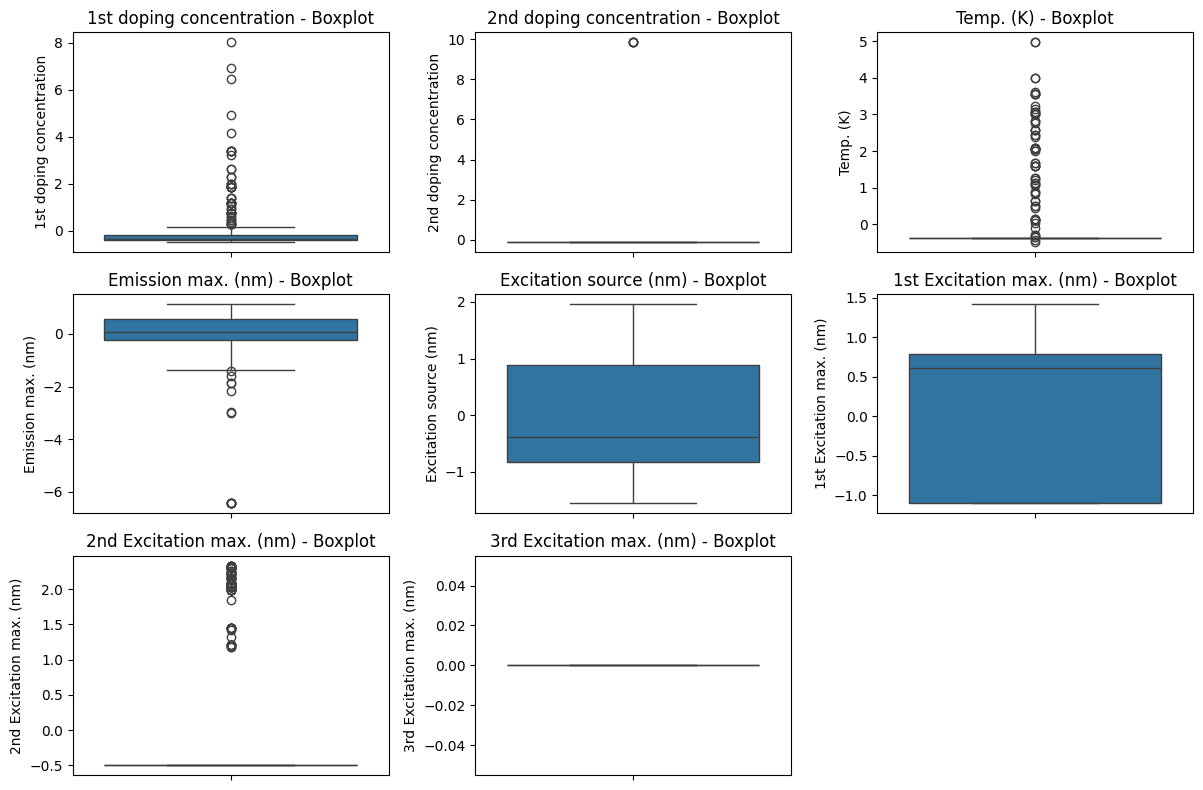

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用箱线图检查每一列的异常值
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])
    plt.title(f'{col} - Boxplot')
plt.tight_layout()
plt.show()


In [8]:
import numpy as np
from scipy import stats

# 计算每一列的 Z-score
z_scores = stats.zscore(df[num_columns])

# 找出 Z-score 大于 3 的数据点，表示异常值
outliers = (np.abs(z_scores) > 3)

# 展示包含异常值的行
outlier_rows = np.where(outliers)[0]  # 获取所有异常值所在的行
df_outliers = df.iloc[outlier_rows]
df_outliers


,1st doping concentration,2nd dopant,2nd doping concentration,Temp. (K),Emission max. (nm),Excitation source (nm),1st Excitation max. (nm),2nd Excitation max. (nm),3rd Excitation max. (nm),1st dopant valency_4,2nd dopant valency_2.0,2nd dopant valency_4.0
38,3.237103,No material,-0.101535,-0.377876,-0.453898,1.798123,-1.106939,-0.495798,0.0,True,False,False
39,6.935157,No material,-0.101535,-0.377876,-0.453898,1.798123,-1.106939,-0.495798,0.0,True,False,False
59,-0.152780,No material,-0.101535,3.160541,0.084573,-0.875421,-1.106939,-0.495798,0.0,True,False,False
60,-0.152780,No material,-0.101535,3.549378,0.084573,-0.875421,-1.106939,-0.495798,0.0,True,False,False
74,3.391189,No material,-0.101535,-0.377876,0.752277,1.687493,-1.106939,-0.495798,0.0,True,False,False
75,4.161617,No material,-0.101535,-0.377876,0.752277,1.687493,-1.106939,-0.495798,0.0,True,False,False
86,-0.306865,No material,-0.101535,3.063332,0.386117,-0.930736,-1.106939,-0.495798,0.0,True,False,False
87,-0.306865,No material,-0.101535,3.549378,0.386117,-0.930736,-1.106939,-0.495798,0.0,True,False,False
90,3.391189,No material,-0.101535,-0.377876,0.386117,-0.930736,-1.106939,-0.495798,0.0,True,False,False
115,-0.414725,Zn,9.848858,-0.377876,0.235345,-0.377589,-1.106939,-0.495798,0.0,True,True,False


In [9]:
import numpy as np
from scipy import stats

# 计算每一列的 Z-score
z_scores = stats.zscore(df[num_columns])

# 找出 Z-score 大于 3 的数据点，表示异常值
outliers = (np.abs(z_scores) > 3)

# 获取包含异常值的所有行索引
outlier_rows = np.where(outliers)[0]

# 提取出所有包含异常值的行
df_outliers = df.iloc[outlier_rows]

# 确保所有行都能输出显示
pd.set_option('display.max_rows', None)  # 设置最大显示行数为无限制
print(df_outliers)  # 显示所有包含异常值的行

##观察之后这个异常值好像不能删除，这是由于物质不同导致的差异


     1st doping concentration   2nd dopant  2nd doping concentration  \
38                   3.237103  No material                 -0.101535   
39                   6.935157  No material                 -0.101535   
59                  -0.152780  No material                 -0.101535   
60                  -0.152780  No material                 -0.101535   
74                   3.391189  No material                 -0.101535   
75                   4.161617  No material                 -0.101535   
86                  -0.306865  No material                 -0.101535   
87                  -0.306865  No material                 -0.101535   
90                   3.391189  No material                 -0.101535   
115                 -0.414725           Zn                  9.848858   
116                 -0.414725           Si                  9.848858   
117                 -0.414725           Ti                  9.848858   
118                 -0.414725           Ge                  9.84

In [32]:
# ##把39条删了
# Q1 = df[num_columns].quantile(0.25)
# Q3 = df[num_columns].quantile(0.75)
# IQR = Q3 - Q1

# # 过滤掉异常值
# df_no_outliers = df[~((df[num_columns] < (Q1 - 1.5 * IQR)) | (df[num_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [10]:
#标记异常值但不删除，把异常值标记成 1
# 创建一个新列，用来标记异常值
import numpy as np
from scipy import stats

# 计算每一列的 Z-score
z_scores = stats.zscore(df[num_columns])

# 找出 Z-score 大于 3 的数据点，表示异常值
outliers = (np.abs(z_scores) > 3)

# 创建一个新列 'outlier_flag'，用于标记异常值
df['outlier_flag'] = np.where(outliers.any(axis=1), 1, 0)

# 查看含有异常值的行
df_outliers = df[df['outlier_flag'] == 1]
df_outliers



,1st doping concentration,2nd dopant,2nd doping concentration,Temp. (K),Emission max. (nm),Excitation source (nm),1st Excitation max. (nm),2nd Excitation max. (nm),3rd Excitation max. (nm),1st dopant valency_4,2nd dopant valency_2.0,2nd dopant valency_4.0,outlier_flag
38,3.237103,No material,-0.101535,-0.377876,-0.453898,1.798123,-1.106939,-0.495798,0.0,True,False,False,1
39,6.935157,No material,-0.101535,-0.377876,-0.453898,1.798123,-1.106939,-0.495798,0.0,True,False,False,1
59,-0.152780,No material,-0.101535,3.160541,0.084573,-0.875421,-1.106939,-0.495798,0.0,True,False,False,1
60,-0.152780,No material,-0.101535,3.549378,0.084573,-0.875421,-1.106939,-0.495798,0.0,True,False,False,1
74,3.391189,No material,-0.101535,-0.377876,0.752277,1.687493,-1.106939,-0.495798,0.0,True,False,False,1
75,4.161617,No material,-0.101535,-0.377876,0.752277,1.687493,-1.106939,-0.495798,0.0,True,False,False,1
86,-0.306865,No material,-0.101535,3.063332,0.386117,-0.930736,-1.106939,-0.495798,0.0,True,False,False,1
87,-0.306865,No material,-0.101535,3.549378,0.386117,-0.930736,-1.106939,-0.495798,0.0,True,False,False,1
90,3.391189,No material,-0.101535,-0.377876,0.386117,-0.930736,-1.106939,-0.495798,0.0,True,False,False,1
115,-0.414725,Zn,9.848858,-0.377876,0.235345,-0.377589,-1.106939,-0.495798,0.0,True,True,False,1


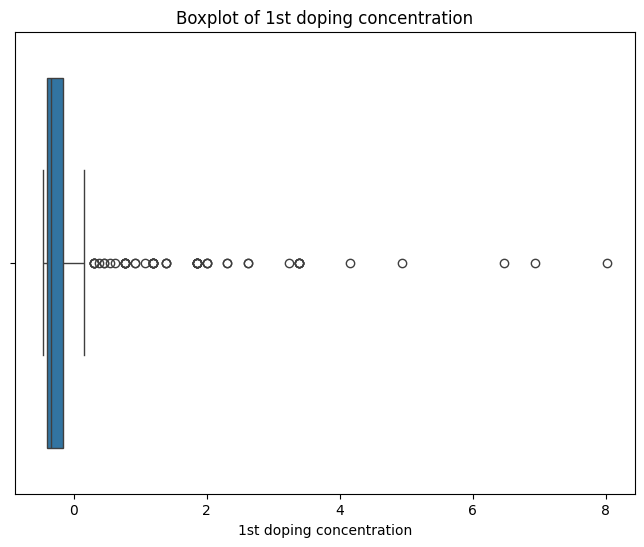

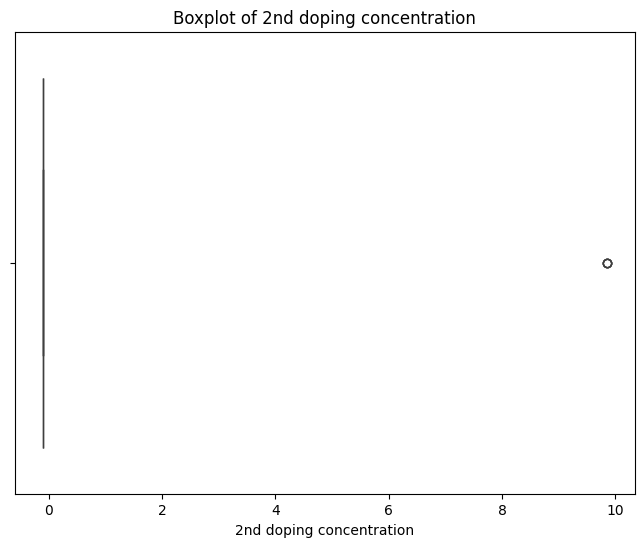

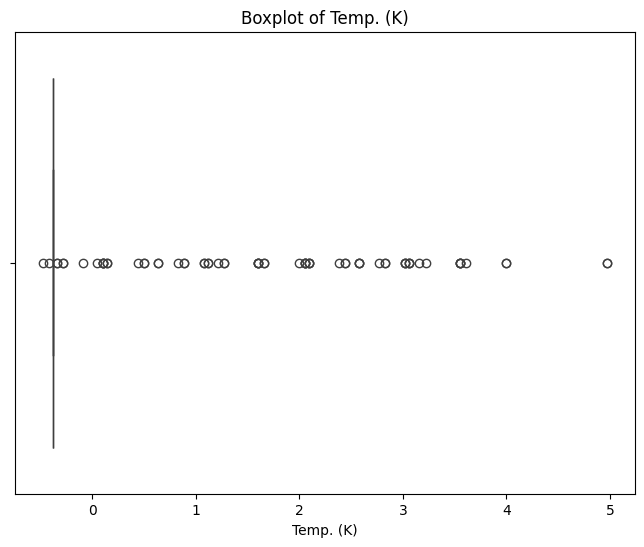

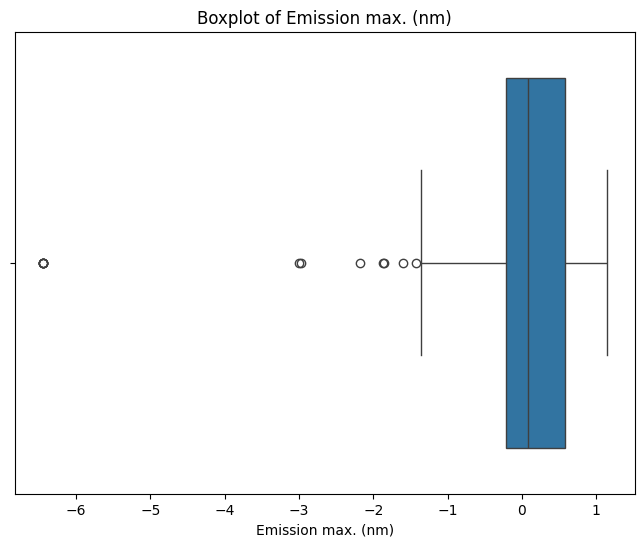

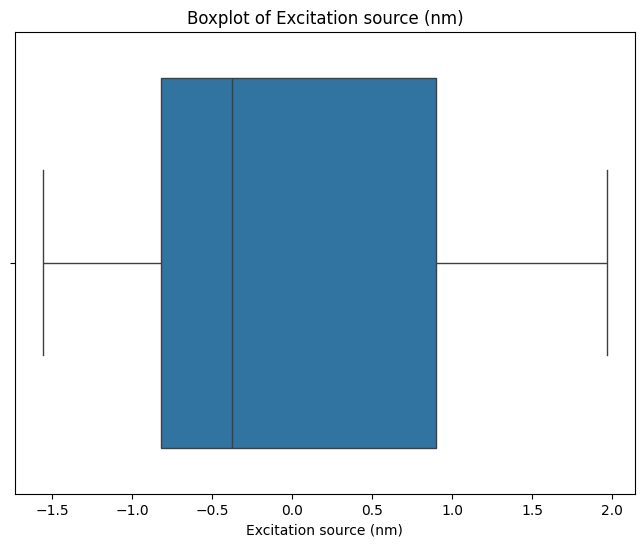

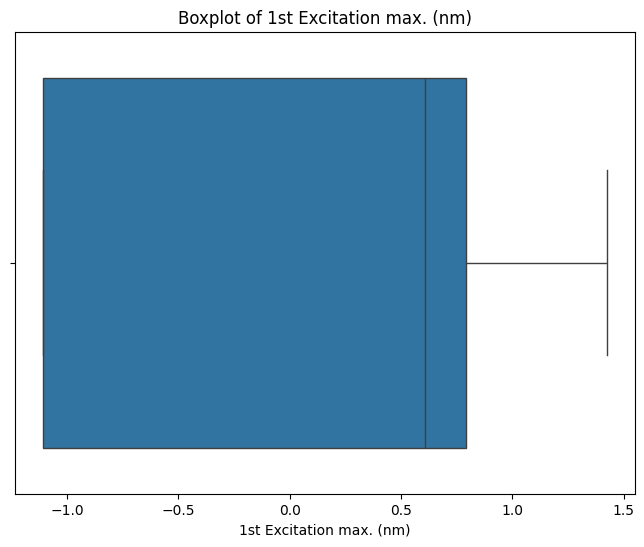

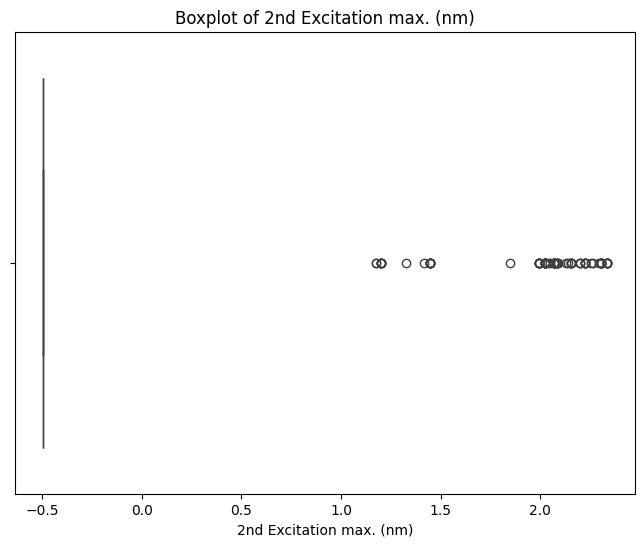

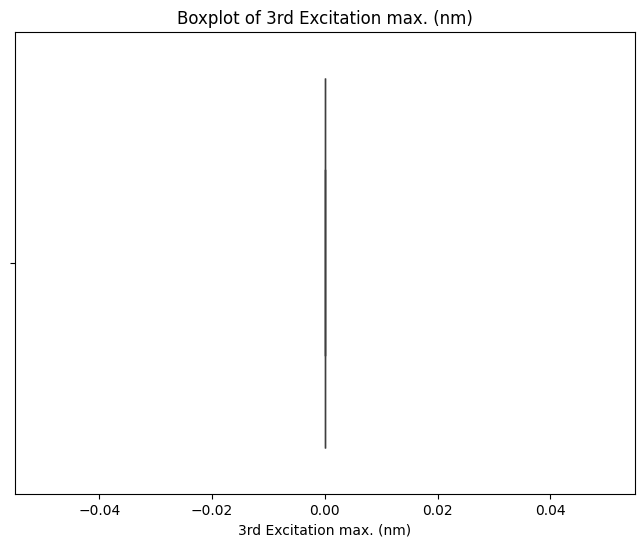

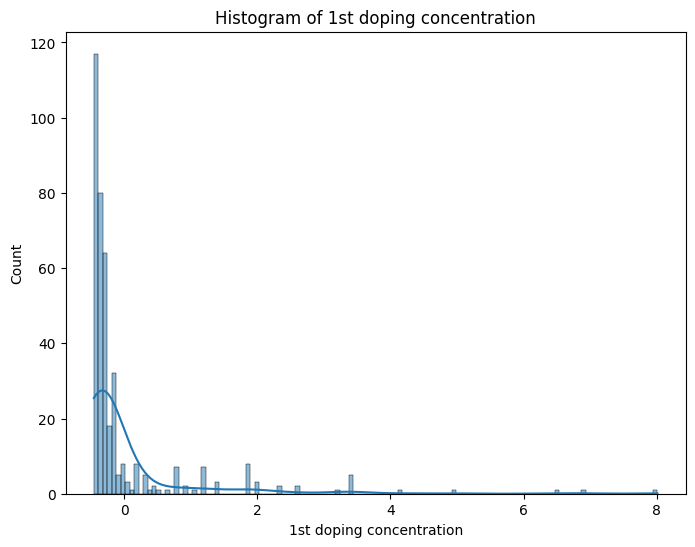

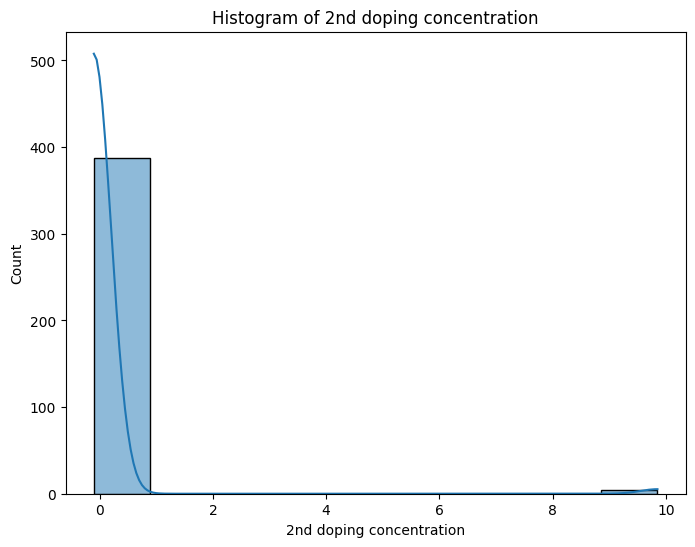

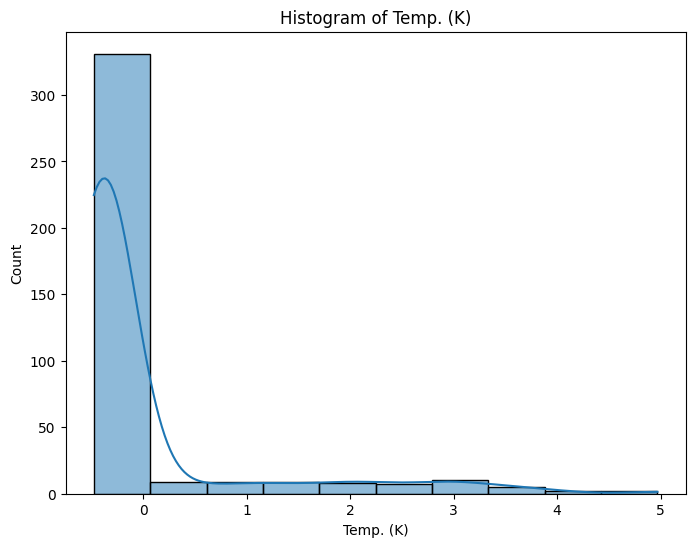

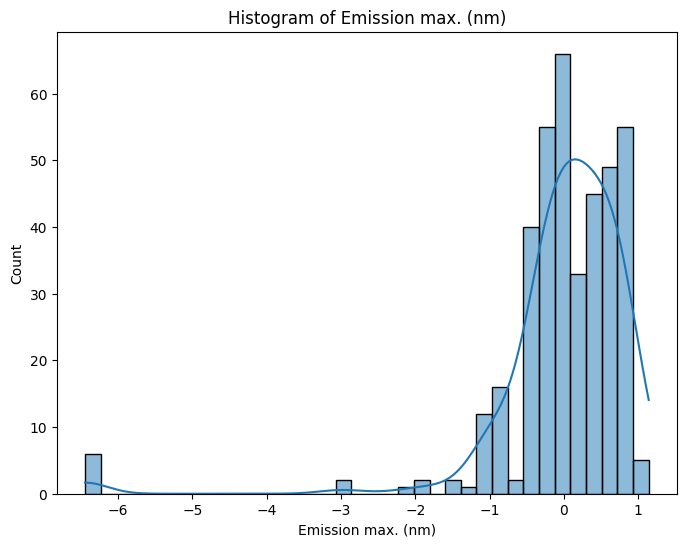

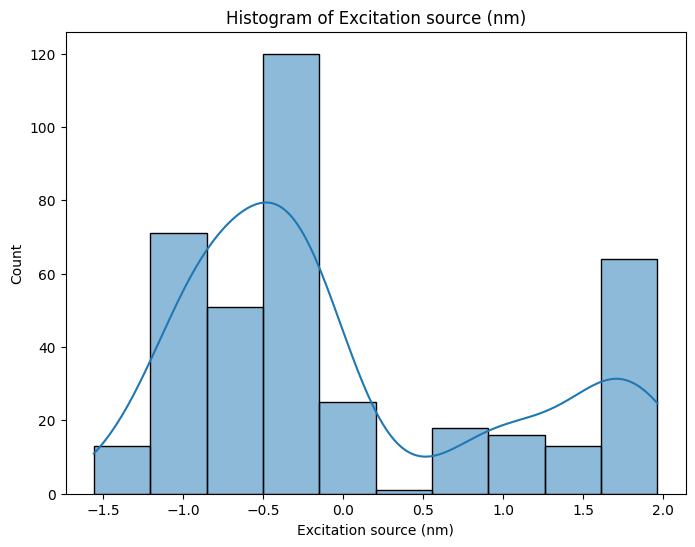

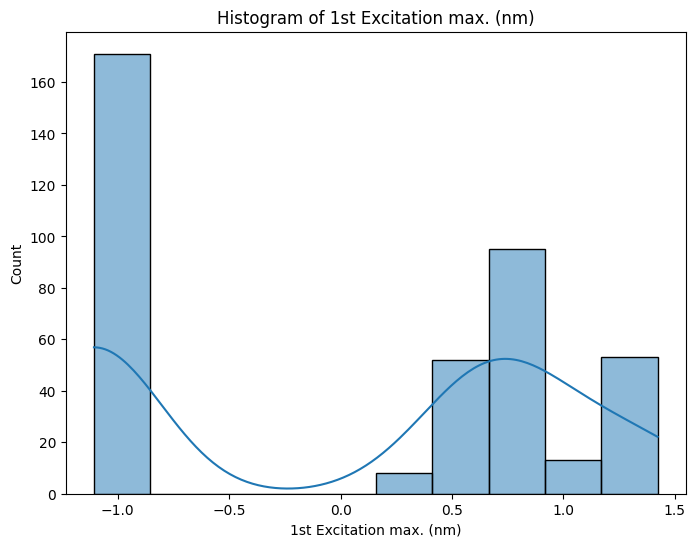

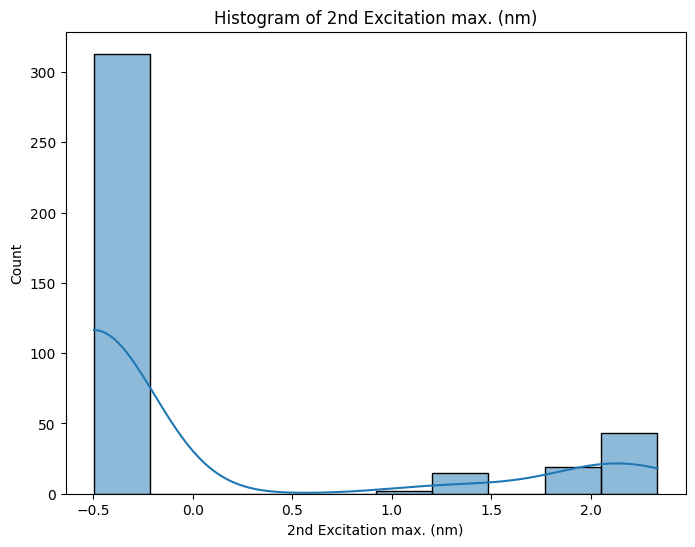

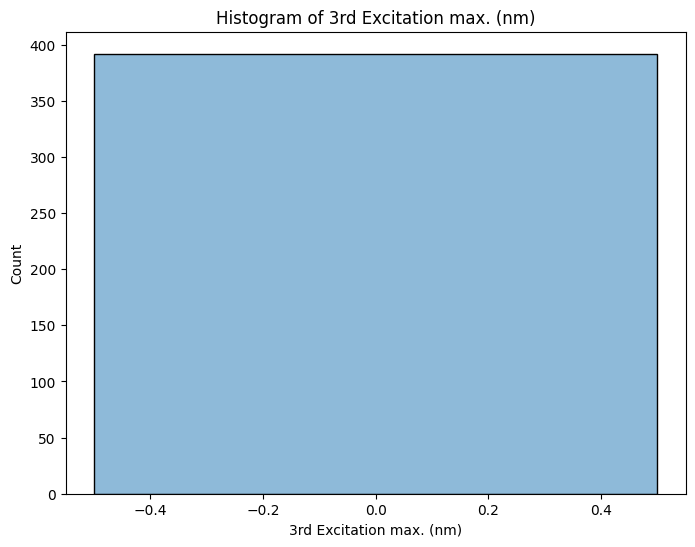

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制每个数值型特征的箱型图
for col in num_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# 绘制每个数值型特征的直方图
for col in num_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


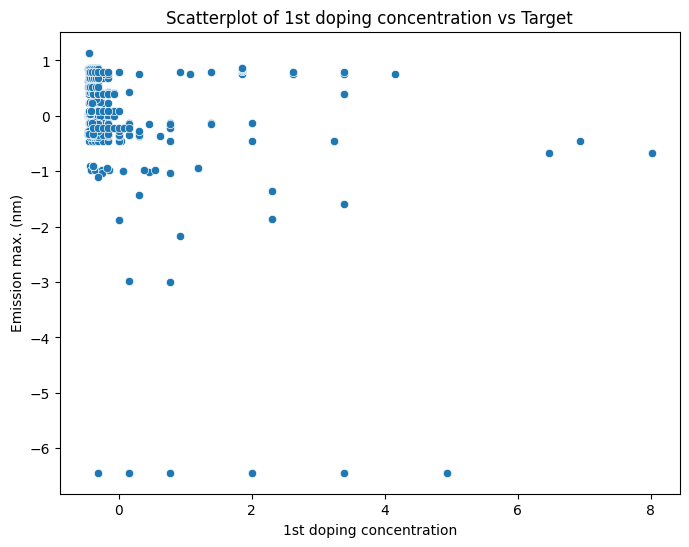

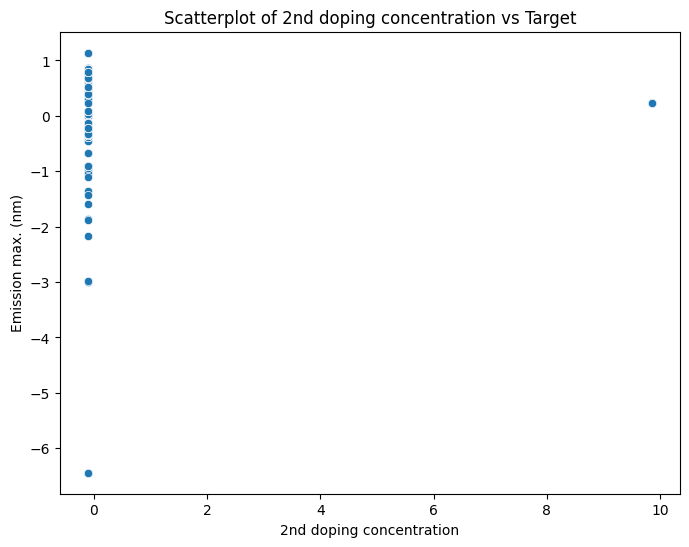

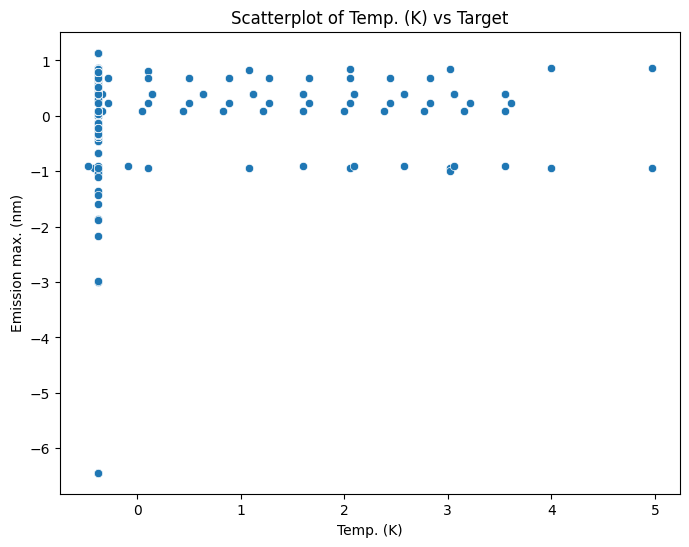

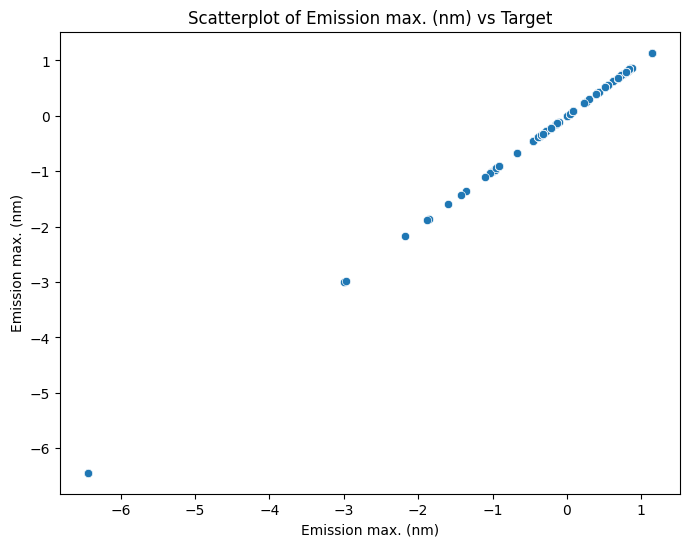

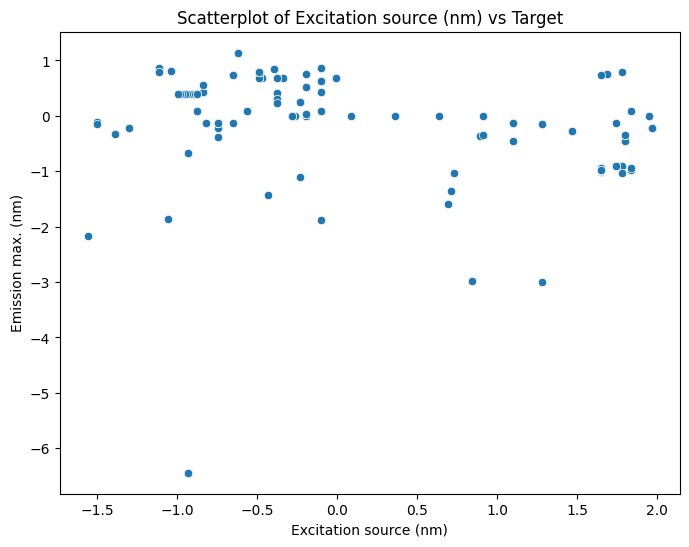

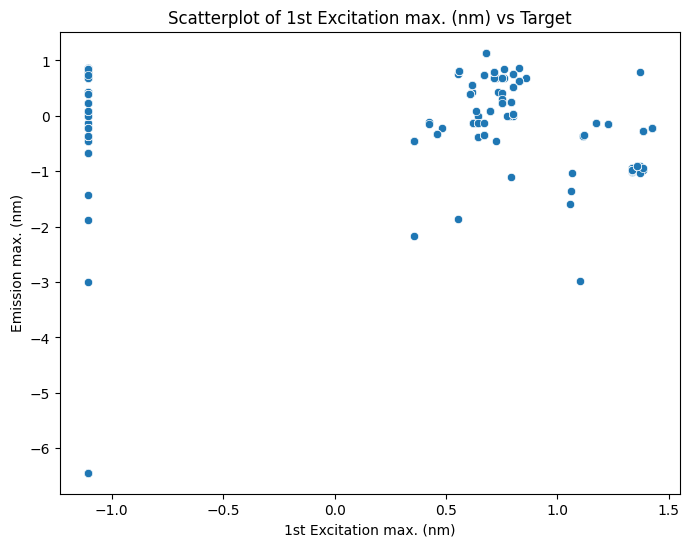

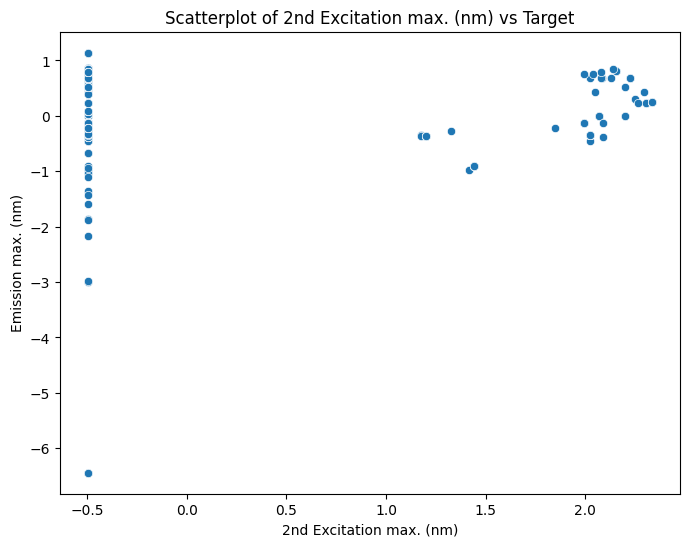

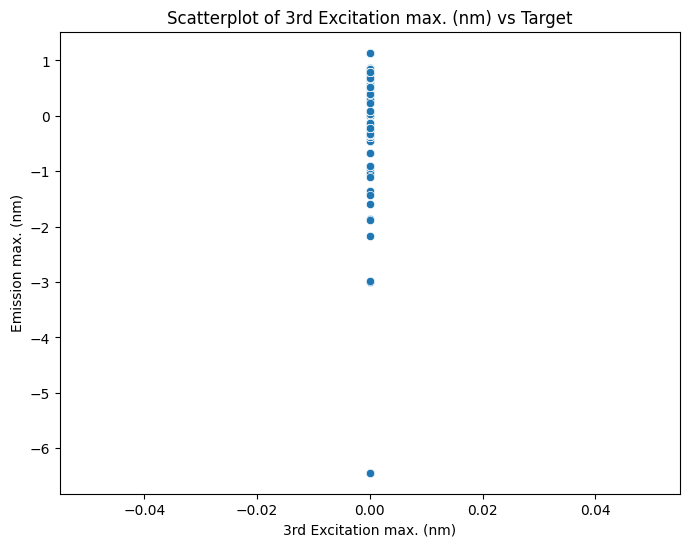

In [12]:
# 观察异常值与其他特征的关系
for col in num_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['Emission max. (nm)'])  # 假设 'target' 是目标变量
    plt.title(f'Scatterplot of {col} vs Target')
    plt.show()


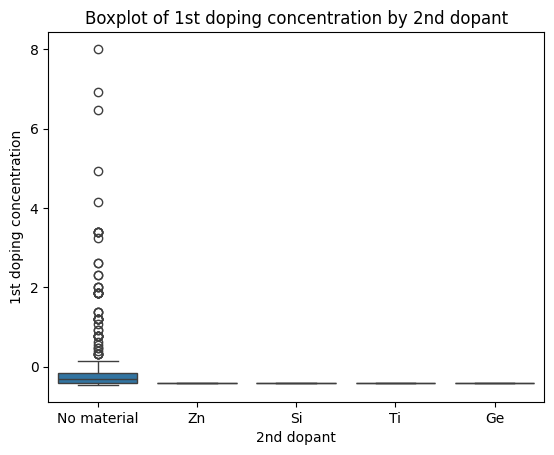

In [13]:
# 比如 '2nd dopant' 是一个分类变量
sns.boxplot(x='2nd dopant', y='1st doping concentration', data=df)
plt.title('Boxplot of 1st doping concentration by 2nd dopant')
plt.show()


In [14]:
# 筛选出数值类型的列
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 计算相关性矩阵
correlation_matrix = df[num_columns].corr()

target_correlation = correlation_matrix['Emission max. (nm)'].sort_values(ascending=False)
print(target_correlation)


Emission max. (nm)          1.000000
2nd Excitation max. (nm)    0.047759
Temp. (K)                   0.032040
2nd doping concentration    0.023896
1st Excitation max. (nm)   -0.066930
Excitation source (nm)     -0.179705
1st doping concentration   -0.279947
outlier_flag               -0.351132
3rd Excitation max. (nm)         NaN
Name: Emission max. (nm), dtype: float64


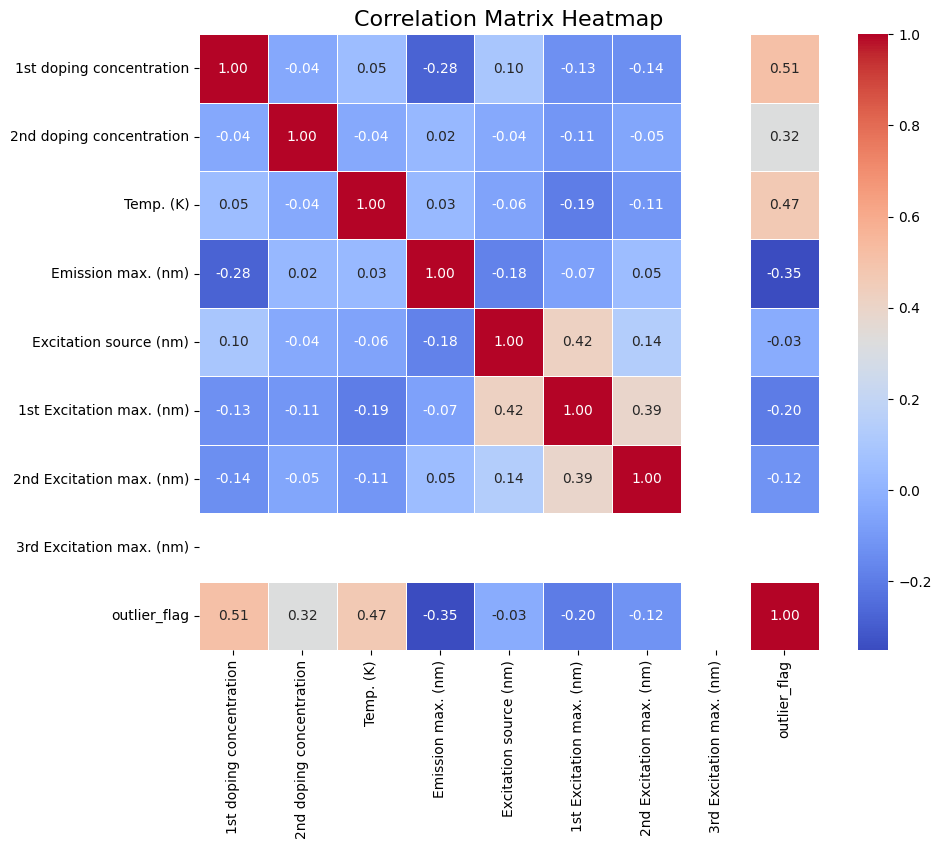

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 筛选出数值类型的列
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 计算相关性矩阵
correlation_matrix = df[num_columns].corr()

# 创建一个热图来展示相关性
plt.figure(figsize=(10, 8))  # 可以调整图的大小
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# 设置标题
plt.title('Correlation Matrix Heatmap', fontsize=16)

# 显示图形
plt.show()


1）X = df.drop(columns=['Emission max. (nm)','outlier_flag'])
y = df['Emission max. (nm)']；2）‘2nd dopant’是分类型变量，‘1st dopant valency_4’	‘2nd dopant valency_2.0’	‘2nd dopant valency_4.0’是布尔型变量

In [16]:
from sklearn.model_selection import train_test_split

# 数据拆分
X = df.drop(columns=['Emission max. (nm)', 'outlier_flag'])
y = df['Emission max. (nm)']



In [17]:
# 对 '2nd dopant' 进行 one-hot 编码
X = pd.get_dummies(X, columns=['2nd dopant'], drop_first=True)


In [18]:

# 拆分为训练集和测试集，80%训练，20%测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(X.dtypes)


1st doping concentration    float64
2nd doping concentration    float64
Temp. (K)                   float64
Excitation source (nm)      float64
1st Excitation max. (nm)    float64
2nd Excitation max. (nm)    float64
3rd Excitation max. (nm)    float64
1st dopant valency_4           bool
2nd dopant valency_2.0         bool
2nd dopant valency_4.0         bool
2nd dopant_No material         bool
2nd dopant_Si                  bool
2nd dopant_Ti                  bool
2nd dopant_Zn                  bool
dtype: object


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# 线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 0.5752840054151396
R2 Score: 0.5736824906784055


In [21]:
from sklearn.ensemble import RandomForestRegressor

# 随机森林回归模型
rf_model = RandomForestRegressor(random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 预测
y_pred_rf = rf_model.predict(X_test)

# 评估模型
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R2 Score: {r2_rf}")


Random Forest - Mean Squared Error: 0.07014412341923154
Random Forest - R2 Score: 0.9480192953251776


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# 梯度提升回归模型
gb_model = GradientBoostingRegressor(random_state=42)

# 训练模型
gb_model.fit(X_train, y_train)

# 预测
y_pred_gb = gb_model.predict(X_test)

# 评估模型
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R2 Score: {r2_gb}")


Gradient Boosting - Mean Squared Error: 0.1257399823839021
Gradient Boosting - R2 Score: 0.906819665404458


In [23]:
from sklearn.svm import SVR

# 支持向量机回归模型
svr_model = SVR(kernel='rbf')

# 训练模型
svr_model.fit(X_train, y_train)

# 预测
y_pred_svr = svr_model.predict(X_test)

# 评估模型
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - Mean Squared Error: {mse_svr}")
print(f"Support Vector Regression - R2 Score: {r2_svr}")


Support Vector Regression - Mean Squared Error: 0.9819277157318376
Support Vector Regression - R2 Score: 0.2723368385627932


In [24]:
from sklearn.neighbors import KNeighborsRegressor

# K 最近邻回归模型
knn_model = KNeighborsRegressor(n_neighbors=5)

# 训练模型
knn_model.fit(X_train, y_train)

# 预测
y_pred_knn = knn_model.predict(X_test)

# 评估模型
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors - Mean Squared Error: {mse_knn}")
print(f"K-Nearest Neighbors - R2 Score: {r2_knn}")


K-Nearest Neighbors - Mean Squared Error: 0.5700739276188752
K-Nearest Neighbors - R2 Score: 0.5775434486896965


In [25]:
from xgboost import XGBRegressor

# XGBoost 回归模型
xgb_model = XGBRegressor(random_state=42)

# 训练模型
xgb_model.fit(X_train, y_train)

# 预测
y_pred_xgb = xgb_model.predict(X_test)

# 评估模型
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R2 Score: {r2_xgb}")


XGBoost - Mean Squared Error: 0.06019448657247018
XGBoost - R2 Score: 0.9553925307345381


In [26]:
from sklearn.tree import DecisionTreeRegressor

# 决策树回归模型
dt_model = DecisionTreeRegressor(random_state=42)

# 训练模型
dt_model.fit(X_train, y_train)

# 预测
y_pred_dt = dt_model.predict(X_test)

# 评估模型
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - Mean Squared Error: {mse_dt}")
print(f"Decision Tree - R2 Score: {r2_dt}")


Decision Tree - Mean Squared Error: 0.08876580380621928
Decision Tree - R2 Score: 0.934219592348498


In [27]:
from sklearn.linear_model import Lasso

# Lasso回归模型
lasso_model = Lasso(alpha=0.1)

# 训练模型
lasso_model.fit(X_train, y_train)

# 预测
y_pred_lasso = lasso_model.predict(X_test)

# 评估模型
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - R2 Score: {r2_lasso}")


Lasso Regression - Mean Squared Error: 1.1506683516663272
Lasso Regression - R2 Score: 0.14729062320517705


In [28]:
from sklearn.linear_model import Ridge

# Ridge回归模型
ridge_model = Ridge(alpha=0.1)

# 训练模型
ridge_model.fit(X_train, y_train)

# 预测
y_pred_ridge = ridge_model.predict(X_test)

# 评估模型
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R2 Score: {r2_ridge}")


Ridge Regression - Mean Squared Error: 0.5789896729712742
Ridge Regression - R2 Score: 0.5709363844977459


In [29]:
from sklearn.linear_model import ElasticNet

# ElasticNet回归模型
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# 训练模型
elasticnet_model.fit(X_train, y_train)

# 预测
y_pred_elasticnet = elasticnet_model.predict(X_test)

# 评估模型
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print(f"ElasticNet Regression - Mean Squared Error: {mse_elasticnet}")
print(f"ElasticNet Regression - R2 Score: {r2_elasticnet}")


ElasticNet Regression - Mean Squared Error: 1.0837540037480906
ElasticNet Regression - R2 Score: 0.19687788423426766


In [30]:
from sklearn.neighbors import KNeighborsRegressor

# K近邻回归模型
knn_model = KNeighborsRegressor(n_neighbors=5)

# 训练模型
knn_model.fit(X_train, y_train)

# 预测
y_pred_knn = knn_model.predict(X_test)

# 评估模型
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors - Mean Squared Error: {mse_knn}")
print(f"K-Nearest Neighbors - R2 Score: {r2_knn}")


K-Nearest Neighbors - Mean Squared Error: 0.5700739276188752
K-Nearest Neighbors - R2 Score: 0.5775434486896965


In [36]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 更新后的分类变量：One-Hot 编码后的分类列名
cat_features = [
    '1st dopant valency_4',          
'2nd dopant valency_2.0',        
'2nd dopant valency_4.0',         
'2nd dopant_No material',        
'2nd dopant_Si',                  
'2nd dopant_Ti',                 
'2nd dopant_Zn',  
]
  

# CatBoost回归模型
catboost_model = CatBoostRegressor(iterations=1000,  # 迭代次数
                                   learning_rate=0.1,  # 学习率
                                   depth=6,  # 树的深度
                                   cat_features=cat_features,  # 分类变量列
                                   verbose=200)  # 每200次输出一次训练信息

# 训练模型
catboost_model.fit(X_train, y_train)

# 预测
y_pred_catboost = catboost_model.predict(X_test)

# 评估模型
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost Regression - Mean Squared Error: {mse_catboost}")
print(f"CatBoost Regression - R2 Score: {r2_catboost}")

0:	learn: 0.9092332	total: 1.12ms	remaining: 1.12s
200:	learn: 0.1321034	total: 60.9ms	remaining: 242ms
400:	learn: 0.0822195	total: 121ms	remaining: 181ms
600:	learn: 0.0647223	total: 178ms	remaining: 118ms
800:	learn: 0.0543163	total: 240ms	remaining: 59.5ms
999:	learn: 0.0490197	total: 297ms	remaining: 0us
CatBoost Regression - Mean Squared Error: 0.05430824200520722
CatBoost Regression - R2 Score: 0.9597545660067728


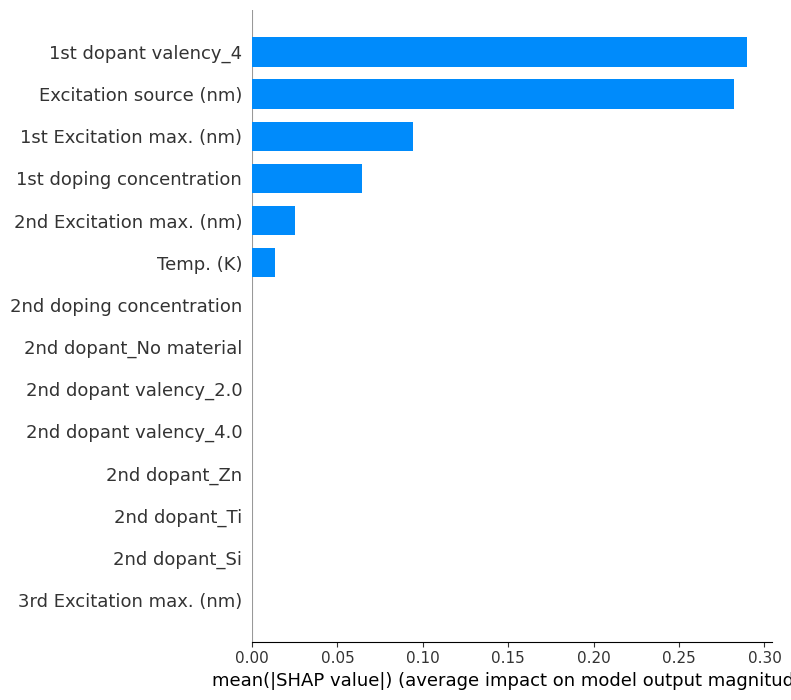

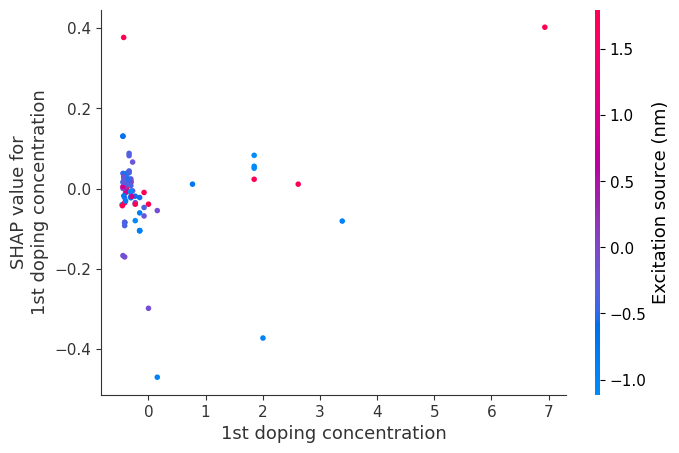

In [37]:
import shap
import catboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor, Pool

# 1. 读取数据
# 假设你已经有训练好的数据 X_train, y_train, X_test
# 这里你需要替换 X_train, X_test, y_train 为你的实际数据

# 2. 训练 CatBoost 模型（如果已有模型，可直接加载）
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=0)
model.fit(X_train, y_train)

# 3. 计算 SHAP 值
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 4. 贡献度图 —— SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 5. 贡献度图 —— SHAP Force Plot (可视化单个样本)
shap.initjs()
sample_idx = 0  # 选择测试集中的第一个样本
shap.force_plot(explainer.expected_value, shap_values[sample_idx, :], X_test.iloc[sample_idx, :])

# 6. 贡献度图 —— SHAP Dependence Plot（分析某个特征）
shap.dependence_plot('1st doping concentration', shap_values, X_test)

plt.show()


In [38]:
import pandas as pd
from catboost import CatBoostRegressor

# 1. 训练好的 CatBoost 模型（如果已有模型，则加载）
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=0)
model.fit(X_train, y_train)  # 如果已经训练好，可以直接加载模型

# 2. 生成预测值
y_pred = model.predict(X_test)

# 3. 创建新的 DataFrame，包含真实值和预测值
results_df = pd.DataFrame({
    'Actual': y_test.values,   # 真实值
    'Predicted': y_pred        # 预测值
})

# 4. 保存到 CSV 文件
results_df.to_csv("catboost_Eu_lmd_predictions.csv", index=False)

# 5. 显示前几行数据
print(results_df.head())

     Actual  Predicted
0  0.386117   0.453034
1 -0.216971  -0.033057
2  0.084573   0.156960
3  0.084573   0.083771
4  0.795354   0.667000
